In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pickle.load(open('final_project/final_project_dataset.pkl'))

In [3]:
df = pd.DataFrame.from_dict(data, orient='index')

In [4]:
df = df.convert_objects(convert_numeric=True)

/home/daniel/miniconda3/envs/udacity-fraud/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [5]:
df['email_address'] = df['email_address'].astype('string')

In [6]:
df['email_address'] = df['email_address'].replace('NaN', np.nan)
df['email_address'].head(10)

ALLEN PHILLIP K          phillip.allen@enron.com
BADUM JAMES P                                NaN
BANNANTINE JAMES M    james.bannantine@enron.com
BAXTER JOHN C                                NaN
BAY FRANKLIN R               frank.bay@enron.com
BAZELIDES PHILIP J                           NaN
BECK SALLY W                sally.beck@enron.com
BELDEN TIMOTHY N            tim.belden@enron.com
BELFER ROBERT                                NaN
BERBERIAN DAVID        david.berberian@enron.com
Name: email_address, dtype: object

In [7]:
len(df)

146

In [8]:
df['poi'].sum()

18

In [9]:
df.index[df.index.map(len) == 29]

Index([u'THE TRAVEL AGENCY IN THE PARK'], dtype='object')

In [10]:
df = df.drop(['THE TRAVEL AGENCY IN THE PARK', 'TOTAL'])

In [11]:
df.isnull().sum()

salary                        50
to_messages                   58
deferral_payments            106
total_payments                21
exercised_stock_options       43
bonus                         63
restricted_stock              35
shared_receipt_with_poi       58
restricted_stock_deferred    127
total_stock_value             19
expenses                      50
loan_advances                141
from_messages                 58
other                         53
from_this_person_to_poi       58
poi                            0
director_fees                128
deferred_income               96
long_term_incentive           79
email_address                 33
from_poi_to_this_person       58
dtype: int64

In [12]:
df['log_total_payments'] = np.log(df['total_payments'])

In [13]:
from sklearn.feature_selection import SelectKBest

In [14]:
select = SelectKBest(k=10)

In [15]:
X = df.drop(['poi', 'email_address'], axis=1).values

In [16]:
y = df['poi'].values

In [17]:
df = df.drop('email_address', axis=1)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
tree = DecisionTreeClassifier()

In [20]:
df['percent_to_poi'] = df['from_this_person_to_poi'] / df['from_messages']

In [21]:
df['percent_from_poi'] = df['from_poi_to_this_person'] / df['to_messages']

In [22]:
zeroed = df.fillna(0)

In [23]:
X = zeroed.drop('poi', axis=1).values
y = zeroed['poi'].values

In [24]:
select.fit(X, y)
pd.DataFrame(select.scores_, columns=['score'], index=zeroed.drop('poi', axis=1).columns).sort_values('score', ascending=False)

,score
exercised_stock_options,25.097542
total_stock_value,24.467654
bonus,21.060002
salary,18.575703
percent_to_poi,16.641707
deferred_income,11.595548
long_term_incentive,10.072455
restricted_stock,9.346701
total_payments,8.873835
shared_receipt_with_poi,8.746486


In [25]:
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
select.fit(X, y)
pd.DataFrame(tree.feature_importances_, columns=['score'], index=zeroed.drop('poi', axis=1).columns).sort_values('score', ascending=False)

,score
exercised_stock_options,0.323000
other,0.190136
percent_to_poi,0.136054
expenses,0.119346
shared_receipt_with_poi,0.118636
salary,0.084656
restricted_stock,0.028171
log_total_payments,0.000000
from_poi_to_this_person,0.000000
long_term_incentive,0.000000


In [56]:
pd.DataFrame(select.pvalues_, columns=['pvalue'], index=zeroed.drop('poi', axis=1).columns).sort_values('pvalue')

,pvalue
exercised_stock_options,0.000002
total_stock_value,0.000002
bonus,0.000010
salary,0.000030
percent_to_poi,0.000075
deferred_income,0.000860
long_term_incentive,0.001845
restricted_stock,0.002670
total_payments,0.003403
shared_receipt_with_poi,0.003634


In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.dummy import DummyClassifier

In [24]:
X = zeroed.drop('poi', axis=1)[['exercised_stock_options','percent_to_poi','shared_receipt_with_poi', 'total_stock_value', 'bonus', 'salary']].values
y = zeroed['poi'].values

In [25]:
zeroed['poi'].value_counts()

False    126
True      18
Name: poi, dtype: int64

In [70]:
def plot_confusion_matrix(cm, classes, name):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(name)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [64]:
def plot_confusion_matrix(cm, classes, name):
#     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(name)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
names = ['Naive Bayes', 'Random Forest', 'Gradient Boosting', 'SVM', 'Dummy']

In [27]:
from sklearn.metrics import confusion_matrix

In [74]:
from sklearn.model_selection import KFold

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [30]:
from sklearn.base import clone

In [31]:
import itertools

In [91]:
kfold = KFold(n_splits=4, random_state=272727)

In [62]:
plt.rcParams['figure.figsize'] = [15, 4]

In [34]:
clfs = [GaussianNB(),
        RandomForestClassifier(),
        GradientBoostingClassifier(),
        LinearSVC(class_weight='balanced'),
        DummyClassifier()
       ]

In [79]:
cms = [[] for _ in clfs]

In [80]:
accuracies = [[] for _ in clfs]

In [81]:
precs = [[] for _ in clfs]

In [82]:
recs = [[] for _ in clfs]

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit

In [78]:
splitter = StratifiedShuffleSplit(n_splits=300, test_size=0.1, random_state=272727)

In [83]:
for i, clf in enumerate(clfs):
    for train, test in splitter.split(X,y):
        clf.fit(X[train], y[train])
        y_pred = clf.predict(X[test])
        cm = confusion_matrix(y[test], y_pred)
        cms[i].append(cm)
        prec = precision_score(y[test], y_pred)
        rec = recall_score(y[test], y_pred)
        acc = accuracy_score(y[test], y_pred)
        precs[i].append(prec)
        recs[i].append(rec)
        accuracies[i].append(acc)

In [84]:
cms = np.array(cms)

In [87]:
for i, (name, cm) in enumerate(zip(names, cms.mean(axis=1)),1):
    plt.subplot(1,5,i)
    plot_confusion_matrix(cm, ['False', 'True'], name)

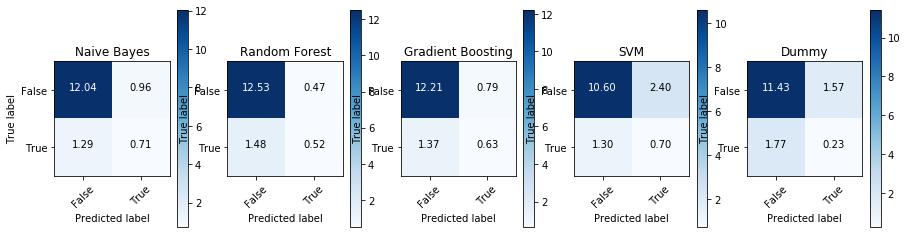

In [88]:
plt.show()

In [89]:
precs = np.array(precs)
recs = np.array(recs)
accs = np.array(accuracies)

In [90]:
for name, prec, rec, acc in zip(names, precs.mean(axis=1),
                                recs.mean(axis=1), accs.mean(axis=1)):
    print('{}: precision {}. recall {}. accuracy {}.'.format(name,prec,rec,acc))

Naive Bayes: precision 0.4035. recall 0.356666666667. accuracy 0.85.
Random Forest: precision 0.348055555556. recall 0.258333333333. accuracy 0.869555555556.
Gradient Boosting: precision 0.386833333333. recall 0.313333333333. accuracy 0.856.
SVM: precision 0.193183640434. recall 0.35. accuracy 0.753333333333.
Dummy: precision 0.110333333333. recall 0.113333333333. accuracy 0.777111111111.


In [99]:
from sklearn.model_selection import GridSearchCV

In [110]:
forest_grid = GridSearchCV(clfs[1], {'n_estimators': [5,10,20,50],
                                     'max_features': [2, 3, 6]},
                           cv=splitter,
                           scoring=['precision', 'recall'],
                           refit=False
                          )

In [142]:
splitter = StratifiedShuffleSplit(n_splits=527, test_size=0.1, random_state=272727)

In [143]:
forest_grid = GridSearchCV(clfs[1], {'n_estimators': [20, 25, 30, 35, 40, 45],
                                     'max_features': [3, 4, 5]},
                           cv=splitter,
                           scoring=['precision', 'recall'],
                           refit=False
                          )

In [153]:
forest_grid = GridSearchCV(clfs[1], {'n_estimators': [45, 50, 55, 60, 65],
                                     'max_features': [5, 6]},
                           cv=splitter,
                           scoring=['precision', 'recall'],
                           refit=False
                          )

In [154]:
forest_grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=527, random_state=272727, test_size=0.1,
            train_size=None),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [45, 50, 55, 60, 65], 'max_features': [5, 6]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
       scoring=['precision', 'recall'], verbose=0)

In [155]:
forest_grid_results = pd.DataFrame.from_dict(forest_grid.cv_results_)

In [158]:
forest_grid_results['mean_test_recall']

0    0.308349
1    0.297913
2    0.319734
3    0.302657
4    0.314042
5    0.302657
6    0.293169
7    0.327324
8    0.289374
9    0.322581
Name: mean_test_recall, dtype: float64

In [168]:
forest_grid = GridSearchCV(clfs[1], {'n_estimators': [55],
                                     'max_features': [6],
                                     'min_impurity_decrease': [0.3,0.4,0.5,0.6,0.7],
                                     'class_weight': [None, 'balanced']},
                           cv=splitter,
                           scoring=['precision', 'recall'],
                           refit=False
                          )

In [169]:
forest_grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=527, random_state=272727, test_size=0.1,
            train_size=None),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [55], 'max_features': [6], 'min_impurity_decrease': [0.3, 0.4, 0.5, 0.6, 0.7], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
       scoring=['precision', 'recall'], verbose=0)

In [174]:
forest = RandomForestClassifier(class_weight='balanced', n_estimators=55, max_features=6)

In [175]:
from sklearn.model_selection import train_test_split

In [177]:
from sklearn.metrics import roc_curve

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [187]:
forest.fit(X_train,y_train)
y_probas = forest.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_probas[:,0])

In [170]:
forest_grid_results = pd.DataFrame.from_dict(forest_grid.cv_results_)

In [171]:
forest_grid_results['mean_test_recall']

0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.401328
6    0.200190
7    0.222011
8    0.267552
9    0.218216
Name: mean_test_recall, dtype: float64

In [173]:
forest_grid_results.iloc[5]['params']

{'class_weight': 'balanced',
 'max_features': 6,
 'min_impurity_decrease': 0.3,
 'n_estimators': 55}

In [159]:
forest_grid_results['mean_test_precision']

0    0.368533
1    0.370557
2    0.391999
3    0.385294
4    0.385389
5    0.360247
6    0.359962
7    0.385737
8    0.341524
9    0.378558
Name: mean_test_precision, dtype: float64

In [160]:
forest_grid_results.iloc[[7,9]]['mean_test_precision']

7    0.385737
9    0.378558
Name: mean_test_precision, dtype: float64

In [161]:
forest_grid_results.iloc[[7,9]]['params']

7    {u'max_features': 6, u'n_estimators': 55}
9    {u'max_features': 6, u'n_estimators': 65}
Name: params, dtype: object

In [163]:
forest_grid = GridSearchCV(clfs[1], {'n_estimators': [55, 65, 75, 85],
                                     'max_features': [6]},
                           cv=splitter,
                           scoring=['precision', 'recall'],
                           refit=False
                          )

In [164]:
forest_grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=527, random_state=272727, test_size=0.1,
            train_size=None),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [55, 65, 75, 85], 'max_features': [6]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
       scoring=['precision', 'recall'], verbose=0)

In [165]:
forest_grid_results = pd.DataFrame.from_dict(forest_grid.cv_results_)

In [166]:
forest_grid_results['mean_test_recall']

0    0.312144
1    0.312144
2    0.304554
3    0.318786
Name: mean_test_recall, dtype: float64

In [167]:
forest_grid_results['mean_test_precision']

0    0.374225
1    0.376787
2    0.375206
3    0.389311
Name: mean_test_precision, dtype: float64

In [112]:
gradient_grid = GridSearchCV(clfs[2], {'loss': ('deviance', 'exponential'),
                                       'n_estimators': [100, 250, 500],
                                       'max_depth': [2, 3, 5]},
                             cv=splitter,
                             scoring=['precision', 'recall'],
                             refit=False
                            )

In [113]:
gradient_grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=300, random_state=272727, test_size=0.1,
            train_size=None),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 250, 500], 'loss': ('deviance', 'exponential'), 'max_depth': [2, 3, 5]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
       scoring=['precision', 'recall'], verbose=0)

In [117]:
forest_grid.cv_results_.keys()[-20:]

['split2_train_precision',
 'split289_test_recall',
 'split8_test_recall',
 'split208_test_precision',
 'split250_train_precision',
 'split39_test_recall',
 'split273_test_precision',
 'split162_test_precision',
 'split292_test_precision',
 'split170_test_recall',
 'split24_test_precision',
 'split206_test_precision',
 'split219_test_recall',
 'split265_train_recall',
 'split82_train_recall',
 'split267_train_precision',
 'split120_train_recall',
 'split174_train_recall',
 'split24_test_recall',
 'split222_test_precision']

In [120]:
forest_grid_results = pd.DataFrame.from_dict(forest_grid.cv_results_)

In [123]:
best_forest = RandomForestClassifier(n_estimators=20, max_features=3)

In [127]:
gradient_grid_results = pd.DataFrame.from_dict(gradient_grid.cv_results_)

In [131]:
gradient_grid_results.iloc[15]['params']

{'loss': 'exponential', 'max_depth': 5, 'n_estimators': 100}

In [134]:
gradient_grid_results.iloc[15]['mean_test_precision']

0.42161904761904762

In [135]:
gradient_grid_results.iloc[15]['mean_test_recall']

0.38666666666666666

In [133]:
best_gradient = GradientBoostingClassifier(loss='exponential', max_depth=5, n_estimators=100)

In [118]:
forest_grid.cv_results_['mean_test_precision']

array([ 0.33944444,  0.31166667,  0.35111111,  0.34633333,  0.31938889,
        0.33166667,  0.39805556,  0.36444444,  0.33884127,  0.30494444,
        0.34861111,  0.3925    ])

In [119]:
forest_grid.cv_results_['mean_test_recall']

array([ 0.28      ,  0.225     ,  0.26333333,  0.26833333,  0.3       ,
        0.25166667,  0.285     ,  0.27666667,  0.32666667,  0.26666667,
        0.29      ,  0.32333333])

In [125]:
gradient_grid.cv_results_['mean_test_precision']

array([ 0.37883333,  0.3665    ,  0.37044444,  0.38905556,  0.38588889,
        0.38316667,  0.40423016,  0.41011905,  0.39938889,  0.38922222,
        0.38011111,  0.38144444,  0.38127778,  0.38127778,  0.37355556,
        0.42161905,  0.40911905,  0.40973016])

In [126]:
gradient_grid.cv_results_['mean_test_recall']

array([ 0.31      ,  0.32      ,  0.32833333,  0.31666667,  0.33      ,
        0.33      ,  0.38666667,  0.39333333,  0.37833333,  0.30666667,
        0.32666667,  0.33833333,  0.31166667,  0.325     ,  0.32833333,
        0.38666667,  0.38      ,  0.385     ])

In [136]:
from sklearn.tree import DecisionTreeClassifier

In [137]:
tree = DecisionTreeClassifier()

In [138]:
tree_grid = GridSearchCV(tree, {'min_samples_split': list(range(2,10))},
                         cv=splitter,
                         scoring=['precision', 'recall'],
                         refit=False
                        )

In [139]:
tree_grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=300, random_state=272727, test_size=0.1,
            train_size=None),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
       scoring=['precision', 'recall'], verbose=0)

In [140]:
tree_grid_results = pd.DataFrame.from_dict(tree_grid.cv_results_)

In [141]:
tree_grid_results.head(10)

,mean_fit_time,mean_score_time,mean_test_precision,mean_test_recall,mean_train_precision,mean_train_recall,param_min_samples_split,params,rank_test_precision,rank_test_recall,...,split9_test_precision,split9_test_recall,split9_train_precision,split9_train_recall,std_fit_time,std_score_time,std_test_precision,std_test_recall,std_train_precision,std_train_recall
0,0.000540,0.001052,0.366008,0.388333,1.000000,1.000000,2,{u'min_samples_split': 2},1,1,...,0.0,0.0,1.000000,1.0000,0.000129,0.000372,0.348157,0.336696,0.000000,0.000000
1,0.000517,0.000991,0.353897,0.343333,1.000000,0.929167,3,{u'min_samples_split': 3},5,4,...,0.0,0.0,1.000000,0.9375,0.000098,0.000185,0.379957,0.342231,0.000000,0.045453
2,0.000509,0.001017,0.323675,0.326667,0.981949,0.863958,4,{u'min_samples_split': 4},8,7,...,0.0,0.0,1.000000,0.8125,0.000103,0.000356,0.361466,0.329073,0.032170,0.056784
3,0.000550,0.001001,0.357175,0.353333,0.968169,0.842917,5,{u'min_samples_split': 5},4,3,...,0.0,0.0,1.000000,0.8125,0.000262,0.000213,0.367434,0.326837,0.042314,0.060483
4,0.000521,0.001042,0.358952,0.355000,0.949057,0.833333,6,{u'min_samples_split': 6},3,2,...,0.0,0.0,1.000000,0.8125,0.000163,0.000423,0.373513,0.333879,0.053240,0.063601
5,0.000510,0.000990,0.363563,0.341667,0.938062,0.810625,7,{u'min_samples_split': 7},2,5,...,0.0,0.0,1.000000,0.8125,0.000100,0.000176,0.380441,0.320048,0.056901,0.072415
6,0.000534,0.001077,0.349167,0.333333,0.928662,0.783750,8,{u'min_samples_split': 8},6,6,...,0.0,0.0,1.000000,0.7500,0.000147,0.000428,0.374032,0.324893,0.064668,0.083426
7,0.000517,0.001008,0.338333,0.316667,0.921104,0.743333,9,{u'min_samples_split': 9},7,8,...,0.0,0.0,0.857143,0.7500,0.000140,0.000245,0.376215,0.321023,0.069631,0.095918


In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
scaler = MinMaxScaler()

In [95]:
X_scaled = scaler.fit_transform(X)

In [96]:
svm_accs = []
svm_precs = []
svm_recs = []

In [97]:
for train, test in splitter.split(X_scaled, y):
    clfs[3].fit(X_scaled[train], y[train])
    y_pred = clfs[3].predict(X_scaled[test])
    svm_accs.append(accuracy_score(y[test], y_pred))
    svm_precs.append(precision_score(y[test], y_pred))
    svm_recs.append(recall_score(y[test], y_pred))

In [98]:
print('SVM: accuracy {}. precision {}. recall {}.'.format(np.mean(svm_accs),
                                                          np.mean(svm_precs),
                                                          np.mean(svm_recs)))

SVM: accuracy 0.769777777778. precision 0.351027777778. recall 0.668333333333.


[1]: Naive Bayes | precision: 0.0, recall: 0.0
[1]: Random Forest | precision: 0.0, recall: 0.0
[1]: Gradient Boosting | precision: 0.0, recall: 0.0
[1]: SVM | precision: 0.0, recall: 0.0
[1]: Dummy | precision: 0.0, recall: 0.0


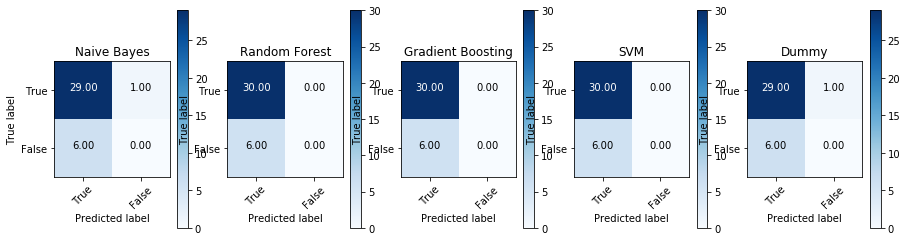

[2]: Naive Bayes | precision: 0.5, recall: 0.25
[2]: Random Forest | precision: 1.0, recall: 0.25
[2]: Gradient Boosting | precision: 0.0, recall: 0.0
[2]: SVM | precision: 0.136363636364, recall: 0.75
[2]: Dummy | precision: 0.2, recall: 0.25


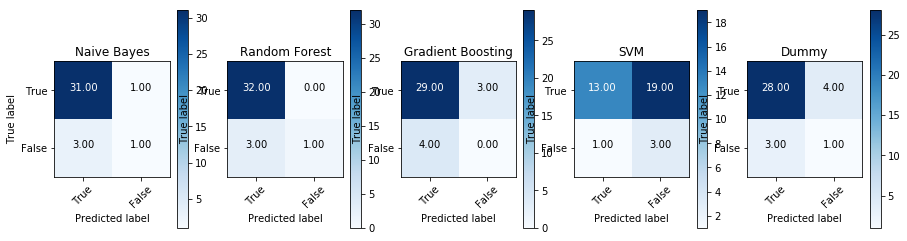

[3]: Naive Bayes | precision: 0.25, recall: 0.333333333333
[3]: Random Forest | precision: 0.5, recall: 0.333333333333
[3]: Gradient Boosting | precision: 0.25, recall: 0.333333333333
[3]: SVM | precision: 0.0, recall: 0.0
[3]: Dummy | precision: 0.0, recall: 0.0


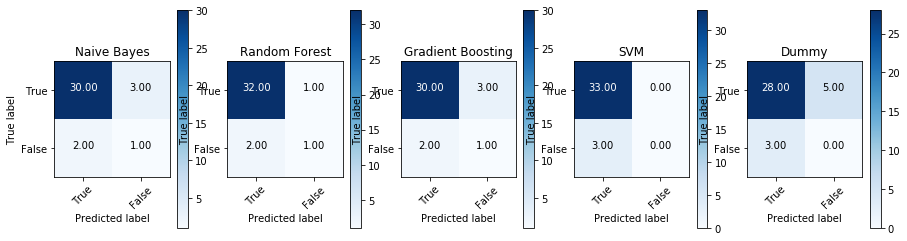

[4]: Naive Bayes | precision: 0.6, recall: 0.6
[4]: Random Forest | precision: 0.666666666667, recall: 0.4
[4]: Gradient Boosting | precision: 0.333333333333, recall: 0.2
[4]: SVM | precision: 0.5, recall: 0.6
[4]: Dummy | precision: 0.333333333333, recall: 0.2


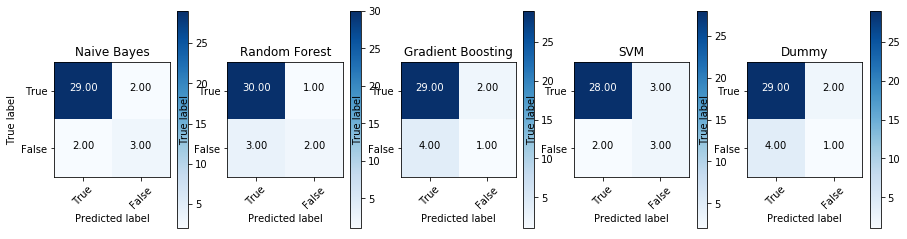

Naive Bayes | average precision: 0.6, average recall: 0.6
Random Forest | average precision: 0.541666666667, average recall: 0.245833333333
Gradient Boosting | average precision: 0.145833333333, average recall: 0.133333333333
SVM | average precision: 0.159090909091, average recall: 0.3375
Dummy | average precision: 0.133333333333, average recall: 0.1125


In [97]:
avg_precision = [0 for _ in clfs]
avg_recall = [0 for _ in clfs]
for trial, (train_i, test_i) in enumerate(kfold.split(X),1):
    for i, (name, clf) in enumerate(zip(names, clfs), 1):
        local_clf = clone(clf)
        local_clf.fit(X[train_i], y[train_i])
        y_pred = local_clf.predict(X[test_i])
        precision = precision_score(y[test_i], y_pred)
        recall = recall_score(y[test_i], y_pred)
        avg_precision[i-1] = precision if i == 1 else (avg_precision[i-1] * (trial-1) + precision) / trial
        avg_recall[i-1] = recall if i == 1 else (avg_recall[i-1] * (trial-1) + recall) / trial
        print('[{}]: {} | precision: {}, recall: {}'.format(trial, name, precision, recall))
        plt.subplot(1,5,i)
        cm = confusion_matrix(y[test_i], y_pred)
        plot_confusion_matrix(cm, ['True', 'False'], name)
    plt.show()
for (name, prec, rec) in zip(names, avg_precision, avg_recall):
    print('{} | average precision: {}, average recall: {}'.format(name,prec,rec))

[1]: Naive Bayes | precision: 0.0, recall: 0.0
[2]: Naive Bayes | precision: 0.5, recall: 0.25
[3]: Naive Bayes | precision: 0.25, recall: 0.333333333333
[4]: Naive Bayes | precision: 0.6, recall: 0.6


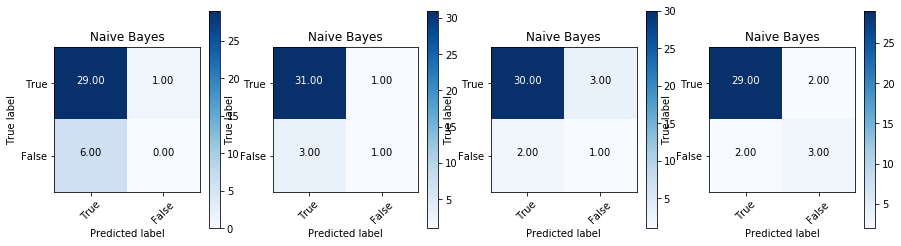

[1]: Random Forest | precision: 0.0, recall: 0.0
[2]: Random Forest | precision: 0.0, recall: 0.0
[3]: Random Forest | precision: 0.0, recall: 0.0
[4]: Random Forest | precision: 0.666666666667, recall: 0.4


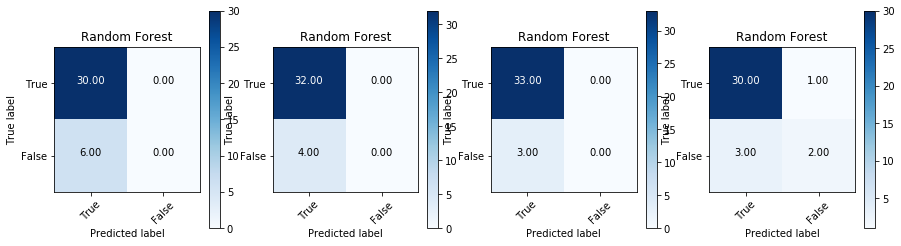

[1]: Gradient Boosting | precision: 0.0, recall: 0.0
[2]: Gradient Boosting | precision: 0.0, recall: 0.0
[3]: Gradient Boosting | precision: 0.25, recall: 0.333333333333
[4]: Gradient Boosting | precision: 0.333333333333, recall: 0.2


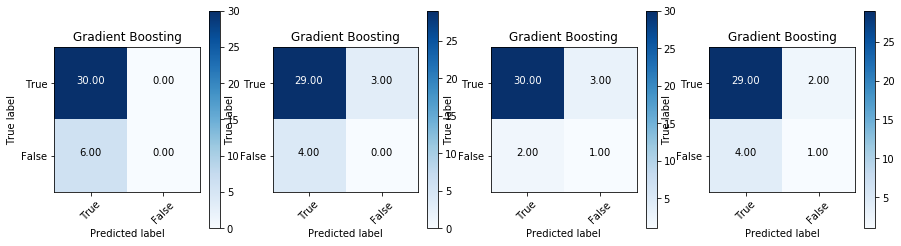

[1]: SVM | precision: 0.0, recall: 0.0
[2]: SVM | precision: 0.5, recall: 0.25
[3]: SVM | precision: 0.2, recall: 0.333333333333
[4]: SVM | precision: 0.0, recall: 0.0


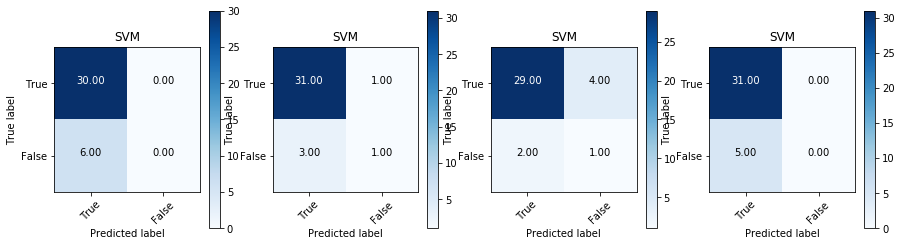

[1]: Dummy | precision: 0.0, recall: 0.0
[2]: Dummy | precision: 0.0, recall: 0.0
[3]: Dummy | precision: 0.0, recall: 0.0
[4]: Dummy | precision: 0.2, recall: 0.2


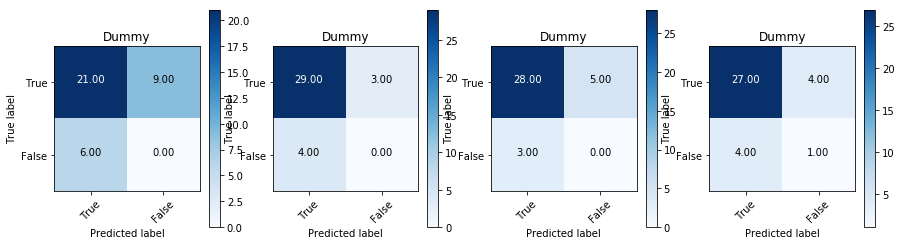

In [96]:
for name, clf in zip(names, clfs):
    for i, (train_i, test_i) in enumerate(kfold.split(X), 1):
        local_clf = clone(clf)
        local_clf.fit(X[train_i], y[train_i])
        y_pred = local_clf.predict(X[test_i])
        precision = precision_score(y[test_i], y_pred)
        recall = recall_score(y[test_i], y_pred)
        print('[{}]: {} | precision: {}, recall: {}'.format(i, name, precision, recall))
        plt.subplot(1,4,i)
        cm = confusion_matrix(y[test_i], y_pred)
        plot_confusion_matrix(cm, ['True', 'False'], name)
    plt.show()

In [98]:
from sklearn.metrics import accuracy_score

In [99]:
clf = GaussianNB()

In [100]:
accuracies = []
for train, test in kfold.split(X):
    clf.fit(X[train], y[train])
    y_pred = clf.predict(X[test])
    accuracies.append(accuracy_score(y[test], y_pred))

In [101]:
accuracies

[0.80555555555555558,
 0.88888888888888884,
 0.86111111111111116,
 0.88888888888888884]

In [102]:
np.average(accuracies)

0.86111111111111105